## Librerías empleadas:

In [3]:
import openpyxl as ox
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, t, f
from IPython.display import Markdown, display
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Funciones empleadas en el análisis:

In [4]:
# Conjunto de funciones estadísticas para el análisis de dos conjuntos de datos.

def load_data(file):
    wb = ox.load_workbook(file)
    hoja = wb.active
    anchura = []
    for fila in hoja.iter_rows(min_row=2, max_col=2, values_only=True):
        anchura.append(fila[1])
    anchura1 = anchura[:30]
    anchura2 = anchura[30:]
    return (anchura1, anchura2)

def media_aritmetica(datos):
    media = 0
    for dato in datos:
        media += dato
    resultado = media/len(datos)
    return resultado

def media_geometrica(datos):
    media = 1
    for dato in datos:
        media *= dato
    resultado = media**(1/len(datos))
    return resultado

def mediana(datos):
    datos = sorted(datos)
    if len(datos) % 2 == 0:
        median = (datos[len(datos) // 2] + datos[(len(datos) // 2) - 1]) / 2
    else:
        median = datos[len(datos) // 2]
    return median

def f_absolutas(datos, tuples = True):
    frecuencias_abs = []
    conjunto = list(set(datos))
    for dato in conjunto:
        frecuencias_abs.append((dato, datos.count(dato)))
    if tuples == False:
        frecuencias_abs = [par[1] for par in frecuencias_abs]
    return frecuencias_abs

def moda(datos):
    fmax = max(f_absolutas(datos, tuples = False))
    modas = [str(par[0]) for par in f_absolutas(datos) if fmax == par[1]]
    if len(modas) == 1:
        cadena = modas[0]
    elif len(modas) == 2:
        cadena = ' y '.join(modas)
    else:
        cadena = ' , '.join(modas[:-1]) + ' y ' + modas[-1]
    return cadena   

def f_relativas(datos, tuples = True):
    frecuencias_rel = []
    for par in f_absolutas(datos):
        frecuencias_rel.append((par[0], (par[1] * 100) / len(datos), 2))
    if tuples == False:
        frecuencias_rel = [par[1] for par in frecuencias_rel]
    
    return frecuencias_rel

def f_rel_acum(datos):
    f_rel_acumuladas = []
    f = 0
    for dato in f_relativas(datos, tuples = False):
        f += dato
        f_rel_acumuladas.append(f)
    return f_rel_acumuladas

def percentil(datos, porcentaje):
    return np.quantile(datos, porcentaje)

def boxplot(data1, data2):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    plt.title("Anchura de cráneos")
    plt.xlabel("Anchura del cráneo (mm)")
    plt.ylabel("Período temporal")
    bp = ax.boxplot([data1, data2], tick_labels=['P. Temprano', 'P. Tardío'], patch_artist = True, vert = 0)
    plt.setp(bp['boxes'][0], color = 'mediumorchid')
    plt.setp(bp['boxes'][1], color = 'skyblue')
    plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.7)
    plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 1.5)
    plt.minorticks_on()
    plt.show()
    return

def histogram(data1, data2):
    plt.figure(figsize =(12, 6))
    plt.subplot(1, 2, 1)
    x, y = [v[0] for v in f_absolutas(data1)], [v[1] for v in f_absolutas(data1)]
    plt.bar(x, y, width = .98, color = 'mediumorchid')
    plt.title('P. Temprano.')
    plt.xlabel('Anchuras (mm)')
    plt.ylabel('Frecuencia')
    plt.vlines(media_aritmetica(data1), ymin = 0, ymax = 14, colors = 'red', linestyles = 'dashed')
    plt.grid(linewidth = 0.3)
    plt.ylim(0, 14)

    plt.subplot(1, 2, 2)
    x, y = [v[0] for v in f_absolutas(data2)], [v[1] for v in f_absolutas(data2)]
    plt.bar(x, y, width = .98, color = 'skyblue')
    plt.title('P. Tardío.')
    plt.xlabel('Anchuras (mm)')
    plt.ylabel('Frecuencia')
    plt.vlines(media_aritmetica(data2), ymin = 0, ymax = 14, colors = 'red', linestyles = 'dashed')
    plt.grid(linewidth = 0.3)
    plt.ylim(0, 14)

    plt.suptitle("Anchura de cráneos.")
    plt.show()

    return

def varianza(datos):
    promedio = media_aritmetica(datos)
    n = len(datos)
    var = 0
    for i in range(n):
        var += (datos[i] - promedio)**2
    return var/n

def cuasivarianza(datos):
    promedio = media_aritmetica(datos)
    n = len(datos)
    var = 0
    for i in range(n):
        var += (datos[i] - promedio)**2
    return var/(n-1)

def desv(datos):
    return np.sqrt(varianza(datos))

def cuasidesv(datos):
    return np.sqrt(cuasivarianza(datos))

def pearson(datos):
    coeff = desv(datos) / media_aritmetica(datos)
    return coeff*100

def fisher(datos):
    coeff = 0
    promedio = media_aritmetica(datos)
    desviacion = desv(datos)
    N = len(datos)
    for i in range(N):
        coeff += (datos[i] - promedio)**3
    return coeff/(N*desviacion**3)

def curtosis(datos):
    coeff = 0
    promedio = media_aritmetica(datos)
    desviacion = desv(datos)
    N = len(datos)
    for i in range(N):
        coeff += (datos[i] - promedio)**4
    return (coeff/(N*desviacion**4)) - 3

def ksmr(data, alpha):
    ks_statistic, p_value = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f'Estadístico KS: {round(ks_statistic, 4)}')
    print(f'Valor p: {round(p_value, 4)}')
    if p_value > alpha:
        display(Markdown("No se rechaza $H_0$: $\hspace{3mm}$ los datos siguen una distribución normal."))
    else:
        display(Markdown("Se rechaza $H_0$: $\hspace{3mm}$ los datos NO siguen una distribución normal."))
    return(float(ks_statistic), float(p_value))

def analisis(data1, data2, k = False):
    campos = ["Cantidad de datos", "Media aritmética", "Media geométrica", "Mediana", "Moda", "Mínimo", "25%", "50%", "75%", "Máximo", "Rango", "Cuasivarianza",
              "Cuasidesviación típica", "Varianza", "Desviación típica", "Coeficiente de variación de Pearson (%)", "Coeficiente de asimetría de Fisher (%)",
              "Coeficiente de curtosis (%)"]
    valores = []
    for data in [data1, data2]:
        valores.append([int(len(data)), media_aritmetica(data), media_geometrica(data), mediana(data), moda(data), min(data), percentil(data, .25), percentil(data, .50),
                        percentil(data, .75), max(data), max(data)-min(data), cuasivarianza(data), cuasidesv(data), varianza(data), desv(data), pearson(data),
                        fisher(data), curtosis(data)])
    data = {"Medida": campos, "Predinástico temprano": valores[0], "Predinástico tardío": valores[1]}
    df = pd.DataFrame(data)
    df_styled = df.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}])
    df_styled.format(precision = 2, thousands = '.', decimal = ',')
    df_styled.format(precision = 3, thousands = '.', decimal = ',', subset = pd.IndexSlice[[11, 12, 13, 14, 15, 16, 17], :])
    df_styled.hide(axis = "index")
    boxplot(data1, data2)
    histogram(data1, data2)
    if k == True:
        k1, p1 = ksmr(data1, 0.05)
        k2, p2 = ksmr(data2, 0.05)
        data = {"Medida": ["K", "p"], "P. Temprano": [k1, p1], "P. Tardío": [k2, p2]}
        kolmogorov_smirnov = pd.DataFrame(data)
        kolmogorov_smirnov_styled = kolmogorov_smirnov.style.set_table_styles([
                {'selector': 'th', 'props': [('text-align', 'center')]},
                {'selector': 'td', 'props': [('text-align', 'center')]}])
        kolmogorov_smirnov_styled.format(precision = 5, thousands = '.', decimal = ',')
        kolmogorov_smirnov_styled.hide(axis = "index")
        return df_styled, kolmogorov_smirnov_styled
    else:
        return df_styled

def interval(data1, data2, level):    
    m1, m2 = media_aritmetica(data1), media_aritmetica(data2)
    v1, v2 = varianza(data1), varianza(data2)
    n1, n2 = len(data1), len(data2)

    
    def t_stat(level, g):
        alpha = 1 - level/100
        return t.ppf(1 - alpha / 2, g)
    
    t_crit = t_stat(level, n1 + n2 - 2)
    error = t_crit * np.sqrt((n1*v1 + n2*v2)*(1/n1 + 1/n2))/np.sqrt(n1 + n2 - 2)
    left = (m1 - m2) - error
    right = (m1 - m2) + error
    return (float(left), float(right))

def mean_difference_interval(data1, data2, niveles, printing = False):
    resultados = []
    for level in niveles:
        intervalo = interval(data1, data2, level)
        resultados.append(intervalo)
        if printing == True:
            print(f"El intervalo para la diferencia de medias con un nivel de confianza del {level}% es ({round(intervalo[0], 3)}, {round(intervalo[1], 3)})")

    intervalos_redondeados = []
    for intervalo in resultados:
        intervalos_redondeados.append((round(intervalo[0], 3), round(intervalo[1], 3)))
    data = {"Nivel de confianza (%)": niveles, "Intervalo (mm)": intervalos_redondeados}
    df = pd.DataFrame(data)
    df_styled = df.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}])
    df_styled.format(precision = 3, thousands = '.', decimal = ',')
    df_styled.hide(axis = "index")
    return df_styled

def F(data1, data2, nivel, plotting = False):
    alpha = 1 - nivel/100
    v1, v2 = varianza(data1), varianza(data2)
    n1, n2 = len(data1), len(data2)
    g1, g2 = n1 - 1, n2 - 1
    Fobs = v1/v2
    F1 = f.ppf(alpha/2, g1, g2)
    F2 = f.ppf(1 - alpha/2, g1, g2)
    R = Fobs/F1
    L = Fobs/F2
    
    if plotting == True:
        x = np.linspace(0, 5, 500)
        y = f.pdf(x, g1, g2)
        plt.figure(figsize=(10, 7))
        plt.plot(x, y, label = f"Distribución F({g1}, {g2})", color = 'blue')
        plt.title("Distribución F")
        plt.xlabel("F")
        plt.ylabel("Densidad de probabilidad")
        plt.axvline(L, color = 'red', linestyle = '--', label = f"{round(L, 3)}")
        plt.axvline(R, color = 'red', linestyle = '--', label = f"{round(R, 3)}")
        plt.axvline(Fobs, color = 'green', linestyle = '--', label = f"F = {round(Fobs, 3)}")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()
    return Fobs, L, R

def T(data1, data2, level, plotting = False):    
    alpha = 1 - level/100
    v1, v2 = varianza(data1), varianza(data2)
    m1, m2 = media_aritmetica(data1), media_aritmetica(data2)
    n1, n2 = len(data1), len(data2)
    g = n1 + n2 - 2
    t_crit = t.ppf(1 - alpha / 2, g)
    err = t_crit * np.sqrt((n1*v1 + n2*v2) * (1/n1 + 1/n2)) / np.sqrt(g)
    tobs = (m1 - m2) / err
    
    if plotting == True:
        x = np.linspace(-6, 6, 500)
        y = t.pdf(x, g)
        plt.figure(figsize=(10, 7))
        plt.plot(x, y, label = f"Distribución T({g})", color = 'blue')
        plt.title("Distribución T de Student")
        plt.xlabel("T")
        plt.ylabel("Densidad de probabilidad")
        plt.axvline(-t_crit, color = 'red', linestyle = '--', label = f"{round(-t_crit, 3)}")
        plt.axvline(t_crit, color = 'red', linestyle = '--', label = f"{round(t_crit, 3)}")
        plt.axvline(tobs, color = 'green', linestyle = '--', label = f"t = {round(tobs, 3)}")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()
    return tobs, -t_crit, t_crit

## Análisis.

### Lectura de datos, análisis inicial y test de Kolmogorov-Smirnov:

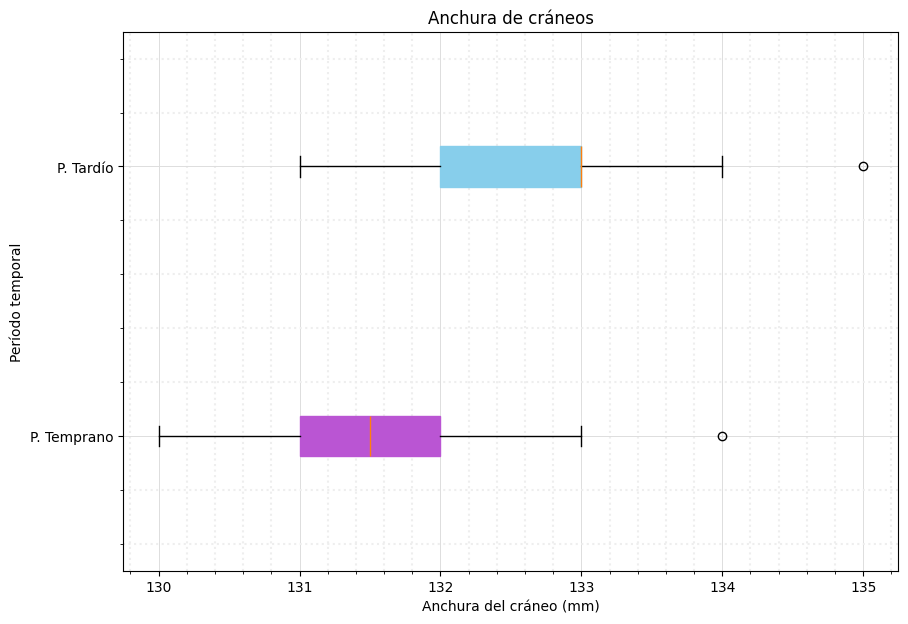

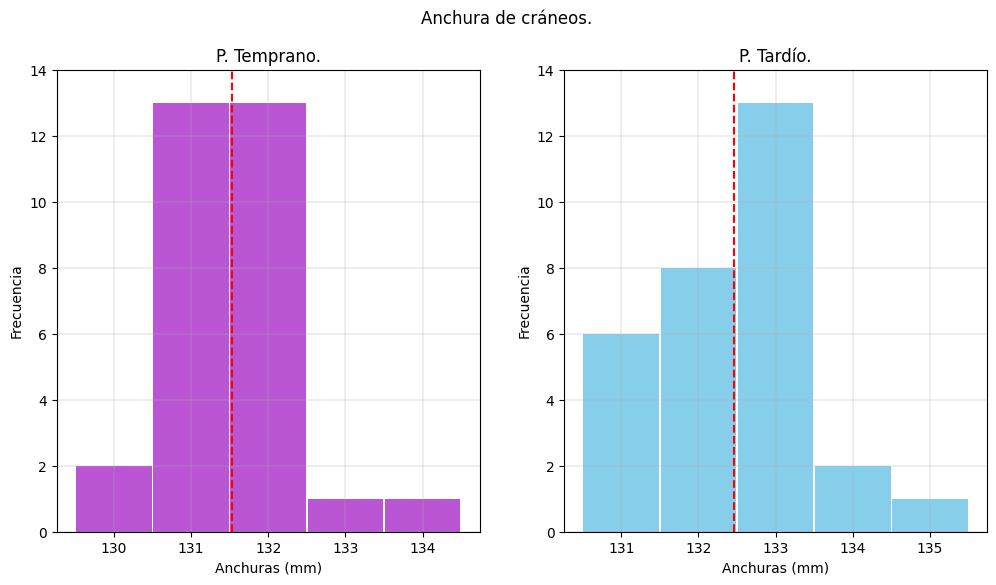

Estadístico KS: 0.246
Valor p: 0.0438


Se rechaza $H_0$: $\hspace{3mm}$ los datos NO siguen una distribución normal.

Estadístico KS: 0.2381
Valor p: 0.0557


No se rechaza $H_0$: $\hspace{3mm}$ los datos siguen una distribución normal.

Medida,P. Temprano,P. Tardío
K,"0,24604","0,23809"
p,"0,04379","0,05573"


Medida,Predinástico temprano,Predinástico tardío
Cantidad de datos,30,30
Media aritmética,"131,53","132,47"
Media geométrica,"131,53","132,46"
Mediana,"131,50","133,00"
Moda,131 y 132,133
Mínimo,130,131
25%,"131,00","132,00"
50%,"131,50","133,00"
75%,"132,00","133,00"
Máximo,134,135


In [5]:
anchura1 = load_data("datosejercicioevaluacionanchuras.xlsx")[0]
anchura2 = load_data("datosejercicioevaluacionanchuras.xlsx")[1]
medidas, kolmogorov_smirnov = analisis(anchura1, anchura2, k = True)
display(kolmogorov_smirnov)
display(medidas)

### Intervalos de confianza para la diferencia de medias:

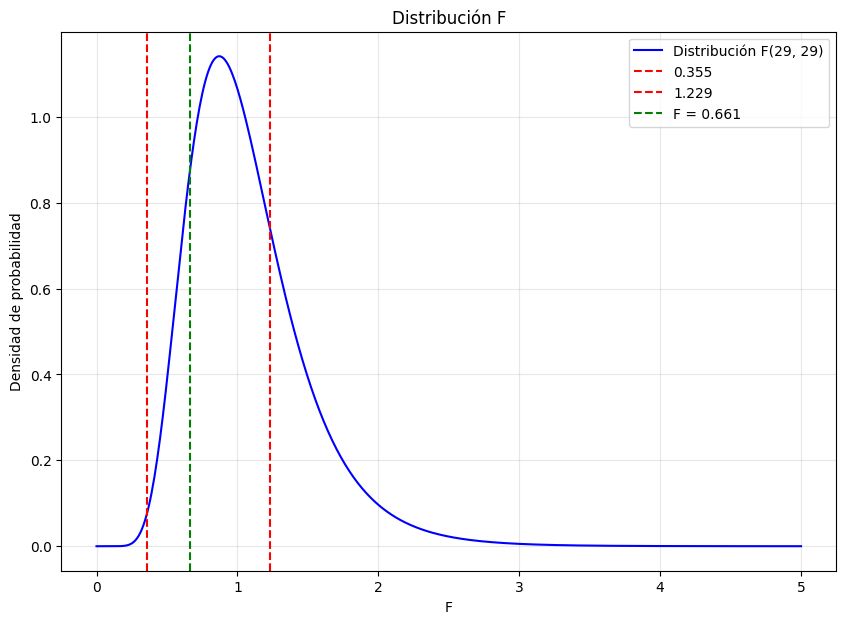

El intervalo para la diferencia de medias con un nivel de confianza del 90% es (-1.33, -0.537)
El intervalo para la diferencia de medias con un nivel de confianza del 95% es (-1.408, -0.459)
El intervalo para la diferencia de medias con un nivel de confianza del 99% es (-1.565, -0.302)


Nivel de confianza (%),Intervalo (mm)
90,"(-1.33, -0.537)"
95,"(-1.408, -0.459)"
99,"(-1.565, -0.302)"


In [6]:
F, Fizq, Fdch = F(anchura1, anchura2, 90, plotting = True)
intervalos = mean_difference_interval(anchura1, anchura2, [90, 95, 99], printing = True)
intervalos

### Prueba t de Student para la diferencia de medias:

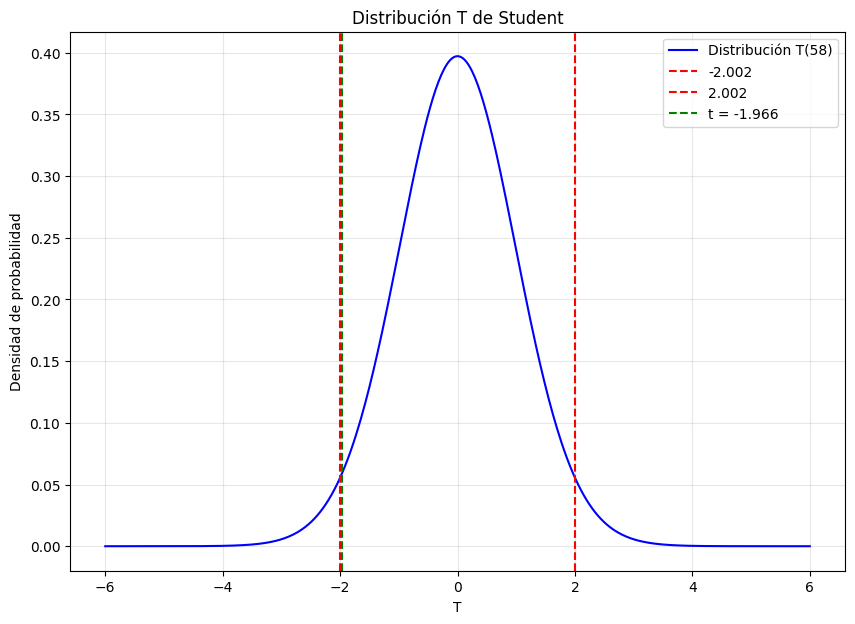

In [8]:
t, tizq, tdch = T(anchura1, anchura2, 95, plotting = True)